# Import all necessary libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [66]:
df = pd.read_csv("Loan_Prediction.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [69]:
df['Gender'].replace({'Male':0,'Female':1}, inplace= True)
df['Married'].replace({'Yes':0,'No':1}, inplace= True)
df['Dependents'].replace({'0':0,'1':1,'2':2,'3+':3}, inplace= True)
df['Education'].replace({'Graduate':0,'Not Graduate':1}, inplace= True)
df['Self_Employed'].replace({'Yes':0,'No':1}, inplace= True)
df['Property_Area'].replace({'Semiurban':0,'Urban':1,'Rural':2}, inplace= True)
df['Loan_Status'].replace({'Y':0,'N':1}, inplace= True)

In [70]:
df['Dependents'].fillna(df['Dependents'].median(), inplace = True)
df['Dependents'].value_counts()

0.0    360
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64

In [67]:
df.drop(['Loan_ID'], axis = 1, inplace = True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    float64
 1   Married            611 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    int64  
 4   Self_Employed      582 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 57.7 KB


In [72]:
df.isna().sum()

Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

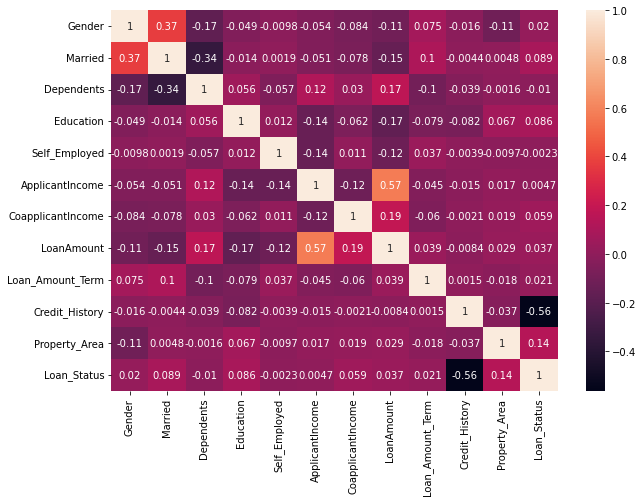

In [75]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), annot = True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    float64
 1   Married            611 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    int64  
 4   Self_Employed      582 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 57.7 KB


In [99]:
df['Gender'].fillna(df['Gender'].mode(), inplace= True)
df['Married'].fillna(df['Married'].median(), inplace= True)
df['Self_Employed'].fillna(df['Self_Employed'].median(), inplace= True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace= True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace= True)
df['Credit_History'].fillna(df['Credit_History'].median(), inplace= True)
df['Property_Area'].fillna(df['Property_Area'].mode(), inplace= True)
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [101]:
x = df.drop('Loan_Status', axis = 1)
y = df['Loan_Status']

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
clf = LogisticRegression()

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1, stratify = y)

In [105]:
clf.fit(x_train, y_train)

C:\Users\shree\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [112]:
y_pred_test = clf.predict(x_test)
y_pred_test[20:25]

array([0, 0, 0, 0, 0], dtype=int64)

In [111]:
y_test[20:25]

551    0
271    0
47     0
71     0
118    1
Name: Loan_Status, dtype: int64

In [117]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_pred_test, y_test))

print(confusion_matrix(y_pred_test, y_test))

print(classification_report(y_pred_test, y_test))

0.8
[[126  36]
 [  1  22]]
              precision    recall  f1-score   support

           0       0.99      0.78      0.87       162
           1       0.38      0.96      0.54        23

    accuracy                           0.80       185
   macro avg       0.69      0.87      0.71       185
weighted avg       0.92      0.80      0.83       185



In [119]:
y_pred_train = clf.predict(x_train)
y_pred_train[10:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [120]:
y_train[10:20]

188    0
308    1
440    0
354    0
363    0
101    0
592    0
13     1
323    0
586    0
Name: Loan_Status, dtype: int64

In [121]:
print(accuracy_score(y_pred_train, y_train))

print(confusion_matrix(y_pred_train, y_train))

print(classification_report(y_pred_train, y_train))

0.8135198135198135
[[287  72]
 [  8  62]]
              precision    recall  f1-score   support

           0       0.97      0.80      0.88       359
           1       0.46      0.89      0.61        70

    accuracy                           0.81       429
   macro avg       0.72      0.84      0.74       429
weighted avg       0.89      0.81      0.83       429



In [122]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0,1.0,5849,0.0,128.0,360.0,1.0,1,0
1,0.0,0.0,1.0,0,1.0,4583,1508.0,128.0,360.0,1.0,2,1
2,0.0,0.0,0.0,0,0.0,3000,0.0,66.0,360.0,1.0,1,0
3,0.0,0.0,0.0,1,1.0,2583,2358.0,120.0,360.0,1.0,1,0
4,0.0,1.0,0.0,0,1.0,6000,0.0,141.0,360.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,1.0,0.0,0,1.0,2900,0.0,71.0,360.0,1.0,2,0
610,0.0,0.0,3.0,0,1.0,4106,0.0,40.0,180.0,1.0,2,0
611,0.0,0.0,1.0,0,1.0,8072,240.0,253.0,360.0,1.0,1,0
612,0.0,0.0,2.0,0,1.0,7583,0.0,187.0,360.0,1.0,1,0


In [123]:
from sklearn.ensemble import AdaBoostClassifier

In [125]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [126]:
clf.fit(x, y)
AdaBoostClassifier(n_estimators=100, random_state=0)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [127]:
y_pred_test = clf.predict(x_test)
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [128]:
accuracy_score(y_pred_test,y_test)

0.827027027027027

In [129]:
y_pred_train = clf.predict(x_train)
y_pred_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [130]:
accuracy_score(y_pred_train,y_train)

0.8554778554778555